<a href="https://colab.research.google.com/github/sordib/exercicios_bootcamp_womakerscode/blob/main/challenge_semana5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Desafio: Estimando o Preço do Imóvel**

##Integrantes do Squad Grace Hopper:


*   Aline Alvino
*   Bianca Sordi
*   Maitê S. Cuevas
*   Marina Arthur
*   Marina Neves
*   Mayara Reghin
*   Victória Viana
*   Wellen Nascimento


---

##Organização da Squad



*  Nos reunimos para discutir sobre o desafio

*  Compartilhamos o colab para deixar livre para todas colaborarem com o desafio

*  Nos reunimos após o desafio estar pronto para conversar sobre o que fizemos, revisar e ajustar

*  As integrantes Mayara, Marina Arthur, Bianca e Victória ficaram responsáveis pela apresentação

---

## Facilidades e dificuldades encontradas no desenvolvimento do desafio

**Facilidades:**
* Mais experiência com os desafios

* Mais tempo para realizá-los

* Boa didática do curso

* Melhor comunicação entre o grupo


**Dificuldades:**
* Base de dados mais complexa
* Maior complexidade do conteúdo

## **Importando bibliotecas e bases de dados**


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import probplot
import matplotlib.pyplot as plt
import warnings #tirar as mensagens de WARNING "Atenção"
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pickle

In [ ]:
dados = pd.read_csv('desafio_01_preco_imoveis230209164627-230918-093224.csv') #importando a base

## **Conhecendo o dataset**


In [ ]:
dados.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045


In [ ]:
dados.shape

(21613, 19)

In [ ]:
#Verificando se há valores nulos
print("Quantidade de valores nulos por coluna:", dados.isnull().sum())

#Removendo valores NAN
dados = dados.dropna()

Quantidade de valores nulos por coluna: id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
dtype: int64


In [ ]:
#Descrevendo as colunas
dados.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,2.161300e+04,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4.580302e+09,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21
std,2.876566e+09,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14
min,1.000102e+06,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52
25%,2.123049e+09,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32




Analisando as informações sobre o preço, o imóvel mais barato custa 75 mil e o mais caro custa 770 milhões, sendo a média 540 mil e a mediana 450 mil.

In [ ]:
#Descobrindo a correlação entre as variáveis
dados.corr().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
id,1.00,-0.02,0.00,0.01,-0.01,-0.13,0.02,-0.00,0.01,-0.02,0.01,-0.01,-0.01,0.02,-0.02,-0.01,-0.00,0.02
price,-0.02,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,0.04,0.67,0.61,0.32,0.05,0.13,-0.05,0.31,0.02
bedrooms,0.00,0.31,1.00,0.52,0.58,0.03,0.18,-0.01,0.08,0.03,0.36,0.48,0.30,0.15,0.02,-0.15,-0.01,0.13
bathrooms,0.01,0.53,0.52,1.00,0.75,0.09,0.50,0.06,0.19,-0.12,0.66,0.69,0.28,0.51,0.05,-0.20,0.02,0.22
sqft_living,-0.01,0.70,0.58,0.75,1.00,0.17,0.35,0.10,0.28,-0.06,0.76,0.88,0.44,0.32,0.06,-0.20,0.05,0.24
sqft_lot,-0.13,0.09,0.03,0.09,0.17,1.00,-0.01,0.02,0.07,-0.01,0.11,0.18,0.02,0.05,0.01,-0.13,-0.09,0.23
floors,0.02,0.26,0.18,0.50,0.35,-0.01,1.00,0.02,0.03,-0.26,0.46,0.52,-0.25,0.49,0.01,-0.06,0.05,0.13
waterfront,-0.00,0.27,-0.01,0.06,0.10,0.02,0.02,1.00,0.40,0.02,0.08,0.07,0.08,-0.03,0.09,0.03,-0.01,-0.04
view,0.01,0.40,0.08,0.19,0.28,0.07,0.03,0.40,1.00,0.05,0.25,0.17,0.28,-0.05,0.10,0.08,0.01,-0.08
condition,-0.02,0.04,0.03,-0.12,-0.06,-0.01,-0.26,0.02,0.05,1.00,-0.14,-0.16,0.17,-0.36,-0.06,0.00,-0.01,-0.11


As variáveis mais correlacionadas são view, bathrooms, sqft_above, grade e sqft_living

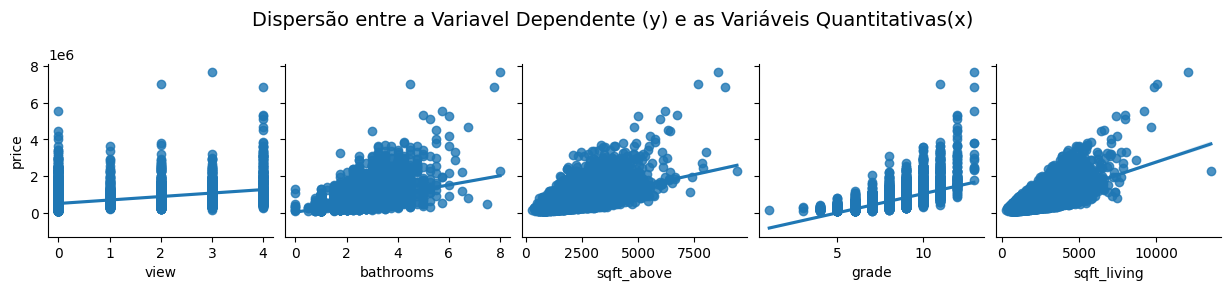

In [ ]:
#Plotando a dispersão das 5 variáveis mais correlacionadas
ax = sns.pairplot(dados, y_vars='price', x_vars=['view','bathrooms', 'sqft_above', 'grade','sqft_living'], kind='reg')
ax.fig.suptitle('Dispersão entre a Variavel Dependente (y) e as Variáveis Quantitativas(x) ', fontsize=14, y=1.12)
ax

## **Analisando a váriavel dependente (Price)**





<Axes: title={'center': 'Distribuição do Preço dos Imóveis'}>

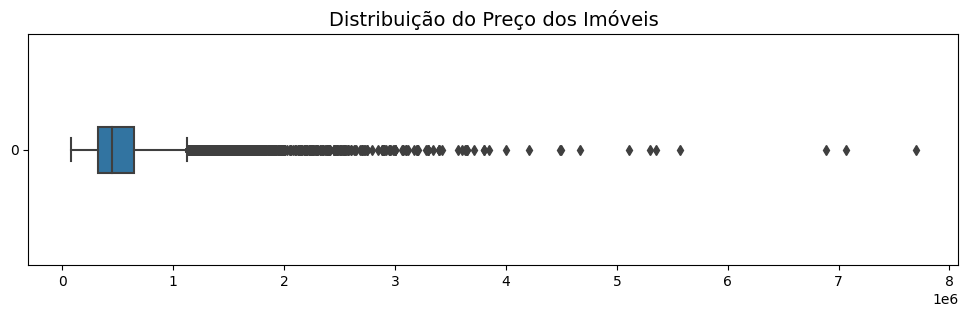

In [ ]:
#Plotando o boxplot da distribuição de preços dos imóveis
ax = sns.boxplot(data=dados['price'], orient='h', width=0.2)
ax.figure.set_size_inches(12, 3)
ax.set_title('Distribuição do Preço dos Imóveis', fontsize=14)
ax

O boxplot está na escala de milhões.

<Axes: title={'center': 'Distribuição de Frequências do Preço dos Imóveis'}, xlabel='price', ylabel='Density'>

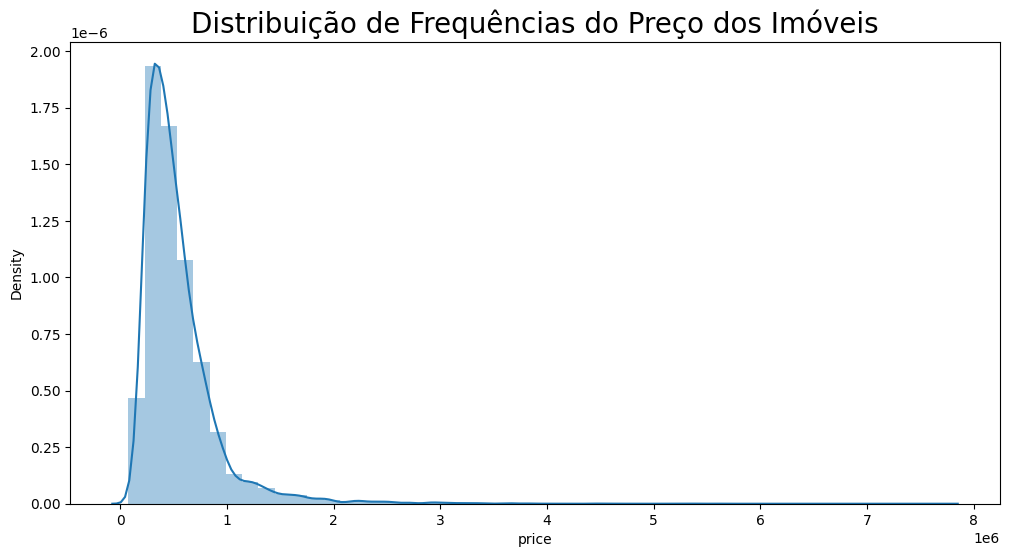

In [ ]:
#Distribuição de frequência do preço dos imóveis
ax = sns.distplot(dados['price'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências do Preço dos Imóveis', fontsize=20)
ax

Com a análise do boxplot e da distribuição de frequência do preço, verificamos que a maioria dos imóveis tem o preço de até 1 milhão, porém há muitos outliers (imóveis com valor maior, até 8 milhões)

## **Desafio: Modelos Regressivos**

#### Estamos em uma empresa do setor imobiliário! Após explorar as principais variáveis que impactam o preco dos imóveis, vamos construir um modelo que estime o preço de um imóvel.


### Construindo o modelo sem tratamento dos dados



Selecionamos as 5 váriaveis mais correlacionadas com o preço para compor nosso modelo.

In [ ]:
y = dados['price']

In [ ]:
X = dados[['view','bathrooms', 'sqft_above', 'grade','sqft_living']]

Construindo um modelo de regressão linear multivariada para estimar o preço do imóvel.


In [ ]:
#Separando dados de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

In [ ]:
#Criando um objeto para receber o modelo de regressão
modelo = LinearRegression()
#Inserindo os dados de treino para treinar nosso modelo
modelo.fit(X_train.values, y_train.values)

LinearRegression()

In [ ]:
 #Calculando o R2 do modelo estimado através do score (quanto mais próximo de 1 melhor, melhor a adequação do modelo)
print('Resultado dos dados de treino: R² = {}'.format(modelo.score(X_train, y_train).round(2)))

Resultado dos dados de treino: R² = 0.58


In [ ]:
#Usando nossos dados de teste para testar o modelo
y_previsto = modelo.predict(X_test)
#Calculando o R2 da reta dos dados de test
print('Resultado dos dados de teste: R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

Resultado dos dados de teste: R² = 0.58


In [ ]:
#Tabela de regressão

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     5870.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                        02:16:26   Log-Likelihood:            -2.9833e+05
No. Observations:               21613   AIC:                         5.967e+05
Df Residuals:                   21607   BIC:                         5.967e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.745e+05   1.32e+04    -43.679      

<Axes: title={'center': 'Real X Previsão'}, xlabel='Preço do Imóvel - Previsão', ylabel='Preço do Imóvel - Real'>

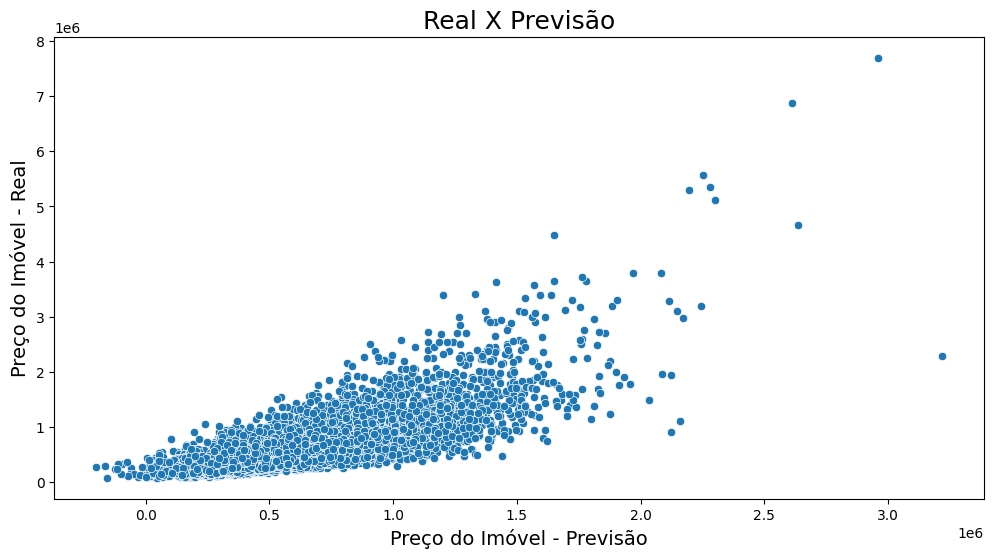

In [ ]:
y_previsto_train = modelo.predict(X_train)

#Gráfico de dispersão entre valor real e estimado

ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Real X Previsão', fontsize=18)
ax.set_xlabel('Preço do Imóvel - Previsão', fontsize=14)
ax.set_ylabel('Preço do Imóvel - Real', fontsize=14)
ax

Nesse modelo, usando os dados fornecidos no dataset sem tratamento, tivemos muitos valores negativos previstos, o que não é adequado para nosso objetivo. Além disso, já percebemos que esse modelo não é ideal para prever valores maiores (como os outliers do nosso modelo)

### **Construindo um modelo com tratamento de dados**

In [ ]:
#Removendo outliers da variável price

#Função que retorna a lista dos index dos outliers
def outliers(dados):
  #quartis
  q3, q1 = np.percentile(dados,[75,25])
  #inter-quartile range
  iqr = q3 - q1

  lim_inferior = q1 - iqr*1.5
  lim_superior = q3 + iqr*1.5

  print("Limite inferior:",lim_inferior)
  print("Limite superior:",lim_superior)

  ls = dados.index[(dados<lim_inferior) | (dados>lim_superior)]
  return ls

index_outliers = outliers(dados['price'])


print("Total de linhas de dados: ", dados['price'].shape)
print("Total de outliers:", len(index_outliers))


#Removendo os outliers
index_list = sorted(set(index_outliers))
dados_tratados = dados.drop(index_outliers)
print("Nova quantidade de linhas de dados:", dados_tratados['price'].shape)



Limite inferior: -162625.0
Limite superior: 1129575.0
Total de linhas de dados:  (21613,)
Total de outliers: 1146
Nova quantidade de linhas de dados: (20467,)


Como há muitos outliers no nosso dataset, foi necessário realizar um tratamento. No caso do preço, foi testado um modelo com as mesmas características do modelo que estamos elaborando agora, mas com os outliers do preço sendo substituidos pela mediana, que é um valor menos sensível a outliers, porém esse modelo não teve um bom resultado, como pode ser observado no gráfico de dispersão abaixo:

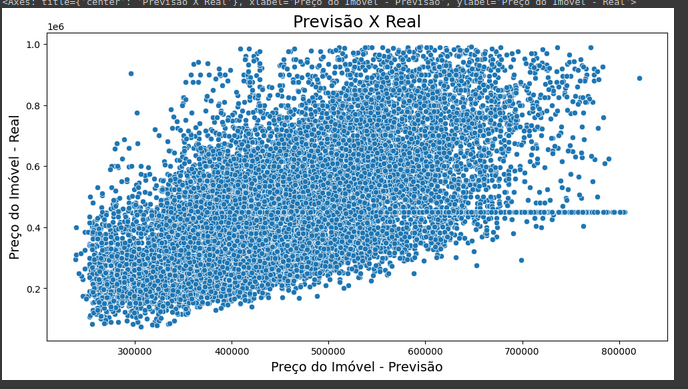

Com a remoção dos outliers do preço tivemos um melhor resultado.

Substituimos também os outliers das variáveis sqft_above, sqft_living e bathrooms pela mediana de cada dado.

No caso da variável view, como o limite inferior e limite superior calculados foram 0, assim como a mediana também é 0, se realizassemos a substituição todos os registros seriam igual a 0 e portanto não faria sentido essa variável estar no nosso modelo. Tentamos remove-la e houve uma diferença muito pequena, mas optamos por deixá-la. Lembrando que a variável view é a menos correlacionada com o preço dentro do nosso modelo.


In [ ]:
#Substituindo outliers do sqft_above pela mediana

#Calculando quartis
q3, q1 = np.percentile(dados_tratados['sqft_above'],[75,25])

#IQR (inter-quartile range)
iqr = q3 - q1

#Calculando limites superior e inferior. Todos os valores que estiverem fora desses limites são outliers
lim_inferior = q1 - iqr*1.5
lim_superior = q3 + iqr*1.5
print("Limite inferior:",lim_inferior)
print("Limite superior:",lim_superior)

#Calculando mediana
mediana = dados_tratados['sqft_above'].median()
print("Mediana da variável sqft_above: ", mediana)

#Substituindo outliers pela mediana

dados_tratados['sqft_above'] = dados_tratados['sqft_above'].apply(
    lambda x: dados_tratados['sqft_above'].median() if (x <= lim_inferior) or (x >= lim_superior) else x
)

Limite inferior: -225.0
Limite superior: 3495.0
Mediana da variável sqft_above:  1520.0


In [ ]:
#Substituindo outliers do sqft_living pela mediana

#Calculando quartis
q3, q1 = np.percentile(dados['sqft_living'],[75,25])

#IQR (inter-quartile range)
iqr = q3 - q1

#Calculando limites superior e inferior. Todos os valores que estiverem fora desses limites são outliers
lim_inferior = q1 - iqr*1.5
lim_superior = q3 + iqr*1.5
print("Limite inferior:",lim_inferior)
print("Limite superior:",lim_superior)

#Calculando mediana
mediana = dados_tratados['sqft_living'].median()
print("Mediana da variável sqft_living: ", mediana)

#Substituindo outliers pela mediana

dados_tratados['sqft_living'] = dados_tratados['sqft_living'].apply(
    lambda x: dados_tratados['sqft_living'].median() if (x <= lim_inferior) or (x >= lim_superior) else x
)

Limite inferior: -257.5
Limite superior: 4234.5
Mediana da variável sqft_living:  1860.0


In [ ]:
#Substituindo outliers do bathrooms pela mediana

#Calculando quartis
q3, q1 = np.percentile(dados['bathrooms'],[75,25])

#IQR (inter-quartile range)
iqr = q3 - q1

#Calculando limites superior e inferior. Todos os valores que estiverem fora desses limites são outliers
lim_inferior = q1 - iqr*1.5
lim_superior = q3 + iqr*1.5
print("Limite inferior:",lim_inferior)
print("Limite superior:",lim_superior)

#Calculando mediana
mediana = dados_tratados['bathrooms'].median()
print("Mediana da variável bathrooms: ", mediana)

#Substituindo outliers pela mediana

dados_tratados['bathrooms'] = dados_tratados['bathrooms'].apply(
    lambda x: dados_tratados['bathrooms'].median() if (x <= lim_inferior) or (x >= lim_superior) else x
)

Limite inferior: 0.625
Limite superior: 3.625
Mediana da variável bathrooms:  2.0


In [ ]:
dados_tratados['bathrooms'] = dados_tratados['bathrooms'].round()

In [ ]:
dados_tratados.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,20141013T000000,221900.0,3,1.0,1180.0,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257
1,6414100192,20141209T000000,538000.0,3,2.0,2570.0,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319
2,5631500400,20150225T000000,180000.0,2,1.0,770.0,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233
3,2487200875,20141209T000000,604000.0,4,3.0,1960.0,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393
4,1954400510,20150218T000000,510000.0,3,2.0,1680.0,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045


In [ ]:
#Substituindo outliers do grade pela mediana

#Calculando quartis
q3, q1 = np.percentile(dados['grade'],[75,25])

#IQR (inter-quartile range)
iqr = q3 - q1

#Calculando limites superior e inferior. Todos os valores que estiverem fora desses limites são outliers
lim_inferior = q1 - iqr*1.5
lim_superior = q3 + iqr*1.5
print("Limite inferior:",lim_inferior)
print("Limite superior:",lim_superior)

#Calculando mediana
mediana = dados_tratados['grade'].median()
print("Mediana da variável grade: ", mediana)

#Substituindo outliers pela mediana

dados_tratados['grade'] = dados_tratados['grade'].apply(
    lambda x: dados_tratados['grade'].median() if (x <= lim_inferior) or (x >= lim_superior) else x
)


Limite inferior: 5.5
Limite superior: 9.5
Mediana da variável grade:  7.0


In [ ]:
#Criando modelo de regressão linear

#Selecionando variáveis

y_modelo = dados_tratados['price']
x_modelo = dados_tratados[[ 'sqft_above', 'bathrooms', 'grade','sqft_living','view']]

#Dados de treino e teste

x_train, x_test, y_train, y_test = train_test_split(x_modelo, y_modelo, test_size=0.3, random_state=2811)

#Criando um objeto para receber o modelo de regressão
modelo_regressao = LinearRegression()

#Inserindo os dados de treino para treinar nosso modelo
modelo_regressao.fit(x_train.values, y_train.values)


LinearRegression()

In [ ]:
#Analisando tabela de regressão do nosso modelo

x2 = sm.add_constant(x_modelo)
est = sm.OLS(y_modelo, x2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     2859.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):               0.00
Time:                        02:16:28   Log-Likelihood:            -2.7428e+05
No. Observations:               20467   AIC:                         5.486e+05
Df Residuals:                   20461   BIC:                         5.486e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -1.84e+05   1.08e+04    -17.064      

Observações sobre a tabela de regressão:

O R2 ficou em cerca de aproximadamente 0.41

O P-valor igual a 0 na maioria dos casos sugere que todas as variáveis são relevantes em nosso modelo. Um p-valor alto (>0,05) sugere que não há uma relação significativa entre a variável x e y.

Analisando o real x previsto


<Axes: title={'center': 'Previsão X Real'}, xlabel='Preço do Imóvel - Previsão', ylabel='Preço do Imóvel - Real'>

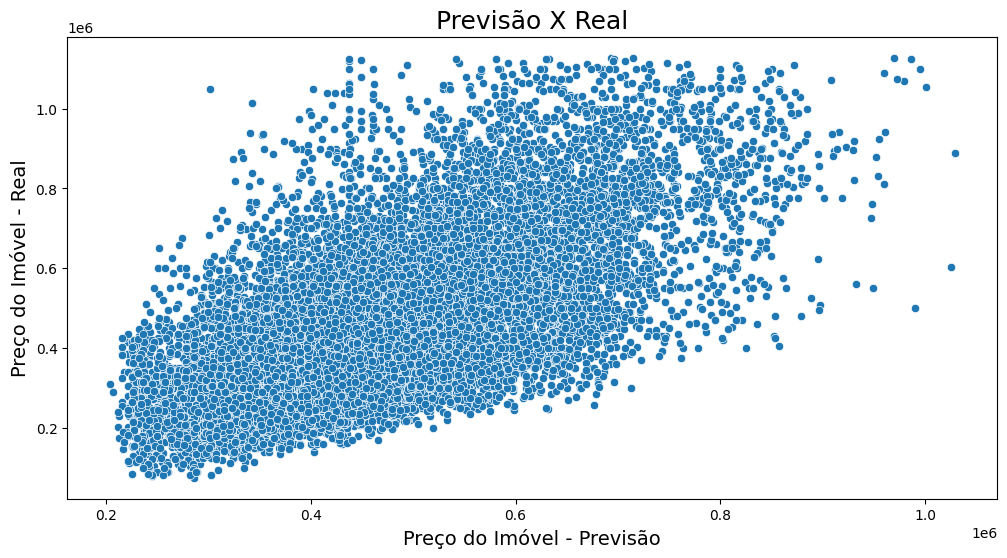

In [ ]:
y_previsto_train = modelo_regressao.predict(x_train)

#Gráfico de dispersão entre valor estimado e real

ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Preço do Imóvel - Previsão', fontsize=14)
ax.set_ylabel('Preço do Imóvel - Real', fontsize=14)
ax

### **Analisando o resíduo**

In [ ]:
#Caculando o resíduo
residuo = y_train - y_previsto_train

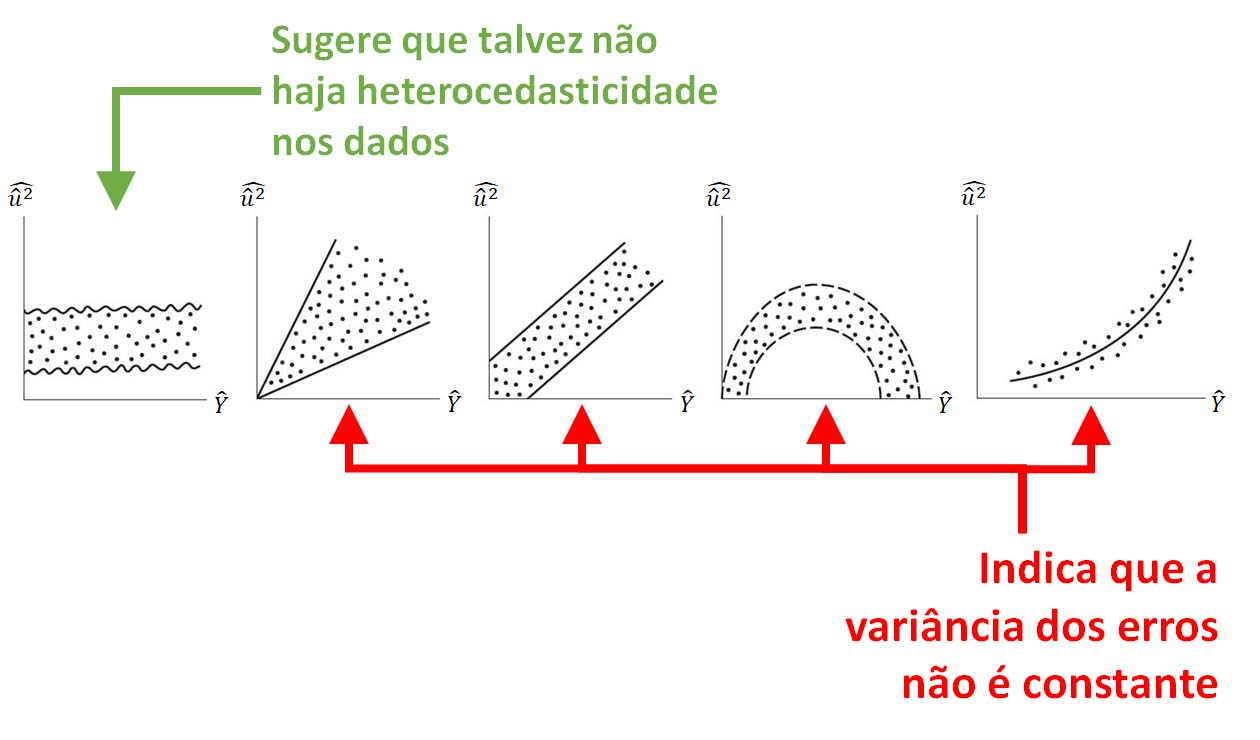

<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Preço do Imóvel - Previsão', ylabel='Resíduos'>

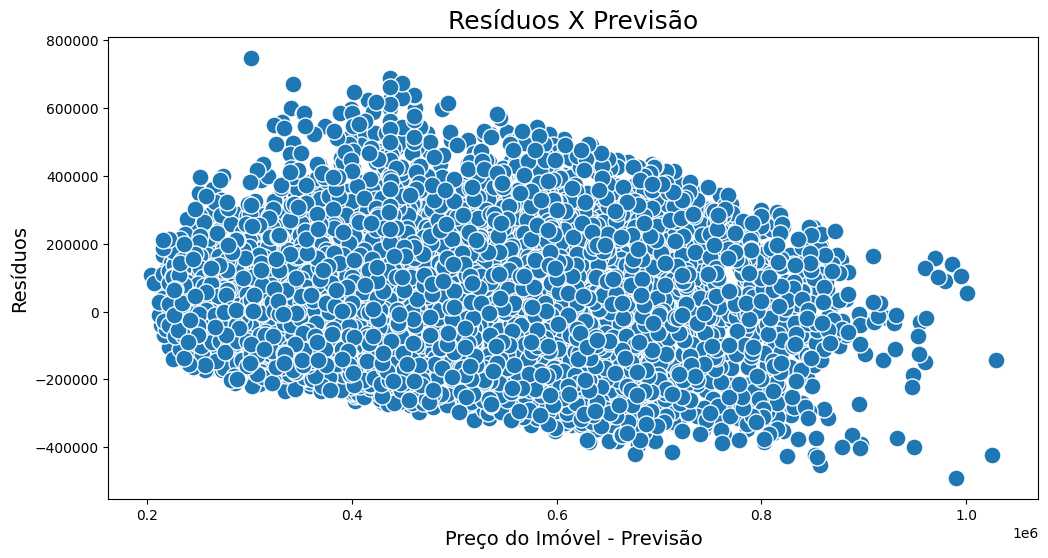

In [ ]:
#Analisando graficamente o resíduo e o valor estimado

ax = sns.scatterplot(x=y_previsto_train, y=residuo, s=150)
ax.figure.set_size_inches(12,6)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Preço do Imóvel - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

A variância dos erros parece não ser constante

<Axes: title={'center': 'Resíduos² X Previsão'}, xlabel='Preço do Imóvel - Previsão', ylabel='Resíduos'>

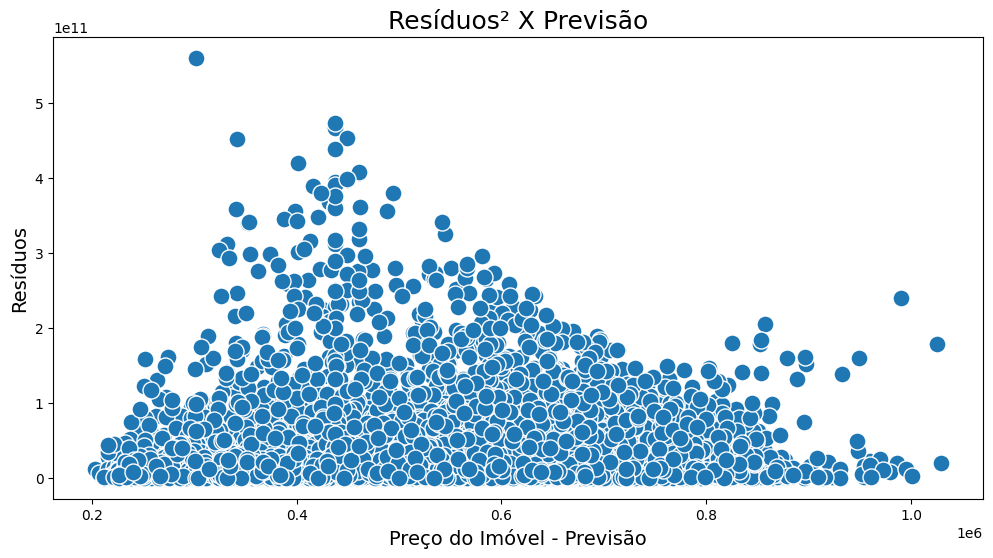

In [ ]:
#Analisando graficamente o resíduo da previsão dos dados de treino ao quadrado
ax = sns.scatterplot(x=y_previsto_train, y=residuo**2, s=150)
ax.figure.set_size_inches(12,6)
ax.set_title('Resíduos² X Previsão', fontsize=18)
ax.set_xlabel('Preço do Imóvel - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

Nesse gráfico, fica mais claro que a variância dos erros não é constante.

<Axes: title={'center': 'Distribuição de Frequências dos Resíduos'}, xlabel='Residuo', ylabel='Density'>

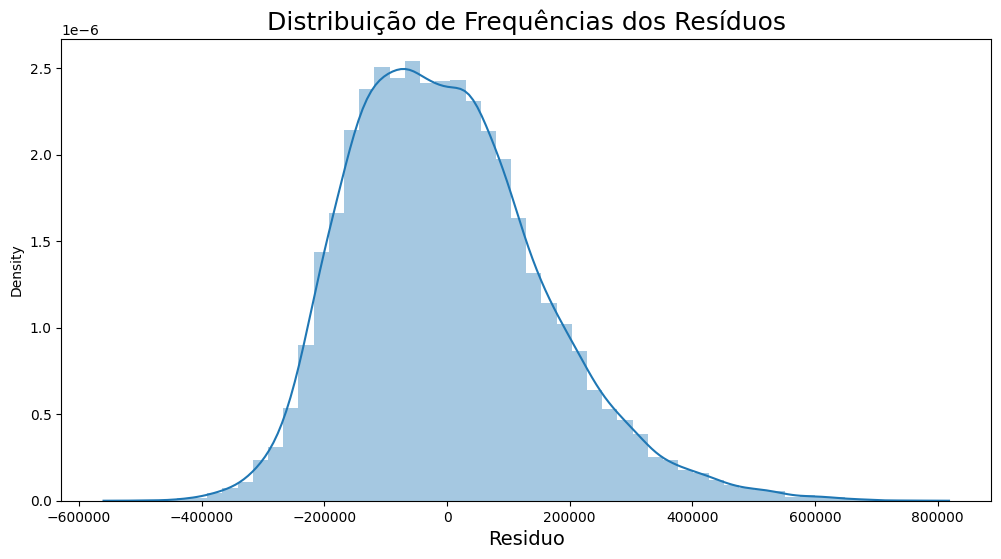

In [ ]:
#Analisando os resíduos por meio de histogramas

ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('Residuo', fontsize=14)
ax

A distribuição dos resídos é aproximadamente normal

###Conclusões

* Comparando o resultado do R2 do modelo de regressão com as 5 váriaveis sem e com tratamento, vemos que apesar do modelo sem tratamento ter um R2 maior, ele não é o melhor modelo, pois prevê valores negativos, o que é inviável para nossos objetivos de cálculo de preço.

* A remoção dos outliers pode ter impactado o modelo, pois removemos cerca de mil dados, porém a substituição dos outliers por média e mediana pioraram o modelo nesse caso e mantê-los também não resultou em um bom modelo.

*   Tendo em vista o resultado dos diferentes modelos testados, concluímos que o modelo com tratamento de dados foi o que atenderia melhor ao nosso objetivo.

*  Talvez a qualidade e a quantidade de dados tenha impactado nosso modelo negativamente e por conta disso não conseguimos obter um melhor modelo.

*   Nosso modelo regressão multivariada com as 5 váriaveis mais correlacionadas possui um bom ajuste aos dados quando se trata de imóveis até 1 milhão. Em imóveis com um valor acima disso, o modelo tende a ficar mais disperso. Isso se deve ao fato de termos muitos dados com valores entre 0 e 1 milhão e apenas alguns ouliers com valores acima disso, portanto nosso modelo não está bem treinado para calcular preços de imóveis mais caros.






## Colocando o modelo em produção
Supondo que encontramos um modelo ideal, como colocariamos ele em produção?

Primeiramente, exportamos o modelo em um arquivo para usá-lo.

In [ ]:
#Exportando nosso modelo como um arquivo pickle

output = open('modelo_precificando_imoveis.pkl', 'wb') #Criando o arquivo
pickle.dump(modelo_regressao, output) #Colocando nosso modelo no arquivo criado
output.close() #Fechando o arquivo por boa prática

Para colocar nosso modelo em produção, usamos o Tkinter, que é uma biblioteca padrão do Python que permite criar interfaces gráficas, para criar uma tela na qual podemos digitar as informações em um formulário para prever o valor do imóvel utilizando nosso modelo de regressão linear.


Para utilizar a interface gráfica é necessário rodar o bloco de código acima para exportar o arquivo pickle e baixar a imagem e o código python utilizando o link abaixo. Para facilitar, todos os arquivos necessários estão na pasta do drive no link.

Após baixar a pasta com todos os arquivos, basta executar o arquivo python.

https://drive.google.com/drive/folders/1axUnMz8ZkL4D1Pze8TrAEfQxiaweuqB4?usp=sharing

No colab o tkinter não funciona, pois esta ferramenta não permite virtualizar interfaces gráficas.
